In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

<h1>Final Project</h1>

<h2>Analyst: Serna Tricia C. & Palas Jamaica</h2>

In [115]:
df = pd.read_csv("Datasets/Family Income and Expenditure.csv")

regions = ["IVA - CALABARZON", "IX - Zasmboanga Peninsula"]
df_filtered = df[df["Region"].isin(regions)]

df_ix = df[df['Region'] == 'IX - Zasmboanga Peninsula'].copy()
df_4a = df[df['Region'] == 'IVA - CALABARZON'].copy()

In [116]:
education_mapping = {
    'No Grade Completed': 0, 'Preschool': 1, 'Grade 1': 2, 'Grade 2': 3, 'Grade 3': 4, 'Grade 4': 5, 
    'Grade 5': 6, 'Grade 6': 7, 'First Year High School': 8, 'Second Year High School': 9, 
    'Third Year High School': 10, 'Fourth Year High School': 11, 'High School Graduate': 12, 
    'Post Secondary': 13, 'College Undergraduate': 14, 'Degree Holder': 15, 'Masters Degree': 16, 
    'Doctorate Degree': 17
}
df_filtered['Education_Numeric'] = df_filtered['Household Head Highest Grade Completed'].map(education_mapping)
df_filtered['Food_Share'] = df_filtered['Total Food Expenditure'] / df_filtered['Total Household Income']
df_filtered['Has_Ref'] = np.where(df_filtered['Number of Refrigerator/Freezer'] > 0, 1, 0)
df_filtered['NonFood_Exp'] = df_filtered['Housing and water Expenditure'] + df_filtered['Transportation Expenditure'] + df_filtered['Education Expenditure'] + df_filtered['Communication Expenditure'] + df_filtered['Medical Care Expenditure'] + df_filtered['Miscellaneous Goods and Services Expenditure']

In [117]:
df_model = df_filtered.dropna(subset=['Total Household Income', 'Total Number of Family members', 'Education_Numeric', 'Household Head Age', 'Imputed House Rental Value', 'NonFood_Exp', 'Has_Ref'])

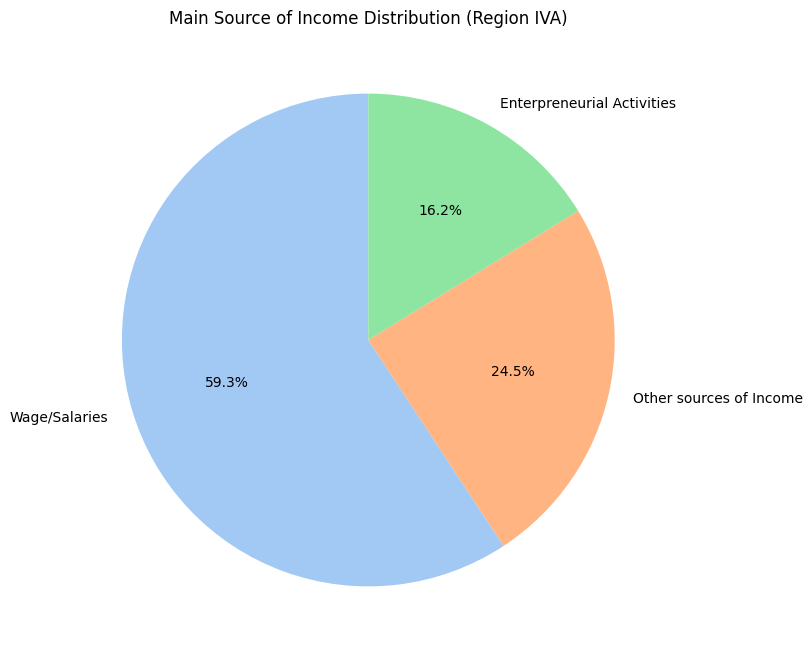

Main Source of Income Distribution (Top 3):
Wage/Salaries 59.25%
Enterpreneurial Activities 24.53%


In [118]:
income_source_counts_4a = df_4a['Main Source of Income'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 8))
sns.set_palette("pastel")
plt.pie(income_source_counts_4a.values, labels=income_source_counts_4a.index, autopct='%1.1f%%', startangle=90)
plt.title('Main Source of Income Distribution (Region IVA)')
plt.show()

print("Main Source of Income Distribution (Top 3):")
print(f"Wage/Salaries {income_source_counts_4a.iloc[0]:.2f}%")
print(f"Enterpreneurial Activities {income_source_counts_4a.iloc[1]:.2f}%")

<h3>In CALABARZON (Region IV-A), most households earn their income from wages and salaries, making up the largest share at 59.3%. This shows that many people in the region depend on regular jobs for their livelihood. Other income sources contribute 24.5%, while entrepreneurial activities make up 16.2%. This means that although small businesses and other income types help support families, salaried work is still the main and most important source of income in the region.</h3>

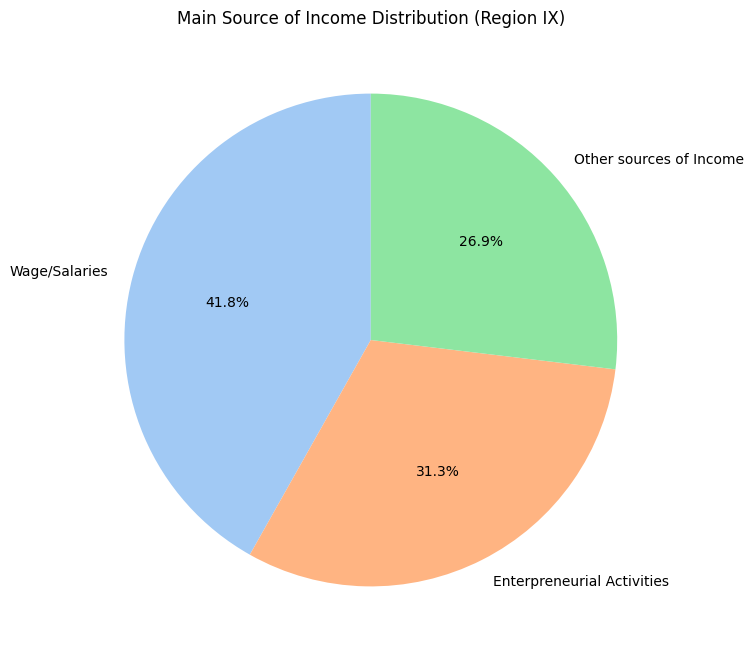

Main Source of Income Distribution (Top 3):
Wage/Salaries 41.83%
Enterpreneurial Activities 31.26%


In [119]:
income_source_counts_ix = df_ix['Main Source of Income'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 8))
sns.set_palette("pastel")
plt.pie(income_source_counts_ix.values, labels=income_source_counts_ix.index, autopct='%1.1f%%', startangle=90)
plt.title('Main Source of Income Distribution (Region IX)')
plt.show()

print("Main Source of Income Distribution (Top 3):")
print(f"Wage/Salaries {income_source_counts_ix.iloc[0]:.2f}%")
print(f"Enterpreneurial Activities {income_source_counts_ix.iloc[1]:.2f}%")

<h3>Most households in Region IX earn their income from wages and salaries, which make up the largest share at 41.8%. Entrepreneurial activities, such as running small businesses or selling goods, contribute 31.3%, showing that many families also rely on small-scale business ventures. Meanwhile, other sources of income account for 26.9%, including things like remittances, pensions, or government support. Overall, this means that families in Region IX earn money from a mix of regular jobs, small businesses, and additional income sources.</h3>

In [120]:
total_income = (
    df_filtered
    .groupby("Region")["Total Household Income"]
    .sum()
)

print("Total Household Income by Region:\n")
print(total_income)

Total Household Income by Region:

Region
IVA - CALABARZON             1262586551
IX - Zasmboanga Peninsula     341509624
Name: Total Household Income, dtype: int64


<h2>CALABARZON (Region IV-A) has a much higher total household income compared to Zamboanga Peninsula (Region IX).The bar for CALABARZON is more than three times taller, which means families in CALABARZON earn far more money overall. This suggests that CALABARZON is more economically developed, has more jobs, and has bigger industries, while Zamboanga Peninsula has lower income levels and is generally more rural.</h2>

In [121]:
total_food_expenditure = (
    df_filtered
    .groupby("Region")["Total Food Expenditure"]
    .sum()
)

print("Food Expeditures of Families in Region IV-A and Region IX\n")
print(total_food_expenditure)

Food Expeditures of Families in Region IV-A and Region IX

Region
IVA - CALABARZON             438399898
IX - Zasmboanga Peninsula    124525829
Name: Total Food Expenditure, dtype: int64


<h2>Families in CALABARZON (Region IV-A) spend much more on food compared to families in Zamboanga Peninsula (Region IX). This is likely because CALABARZON has higher income levels and more households, so people can buy more food and spend more overall. Meanwhile, Region IX shows lower total food spending, which suggests lower income and smaller household consumption.</h2>

In [122]:
food_expenditure_sum = (
    df_filtered
    .groupby("Region")[[
        "Vegetables Expenditure",
        "Total Rice Expenditure",
        "Fruit Expenditure"
    ]]
    .sum()
)
print("Sum of Vegetables Expenditure,Sum of Total Rice Expenditure and Sum of Fruit Expenditure by Region\n")
food_expenditure_sum

Sum of Vegetables Expenditure,Sum of Total Rice Expenditure and Sum of Fruit Expenditure by Region



,Vegetables Expenditure,Total Rice Expenditure,Fruit Expenditure
Region,,,
IVA - CALABARZON,20678479,71839824,12229486
IX - Zasmboanga Peninsula,8031632,26905492,3740507


<h2>Rice has the highest total expenditure in both regions, meaning rice is the main food priority. CALABARZON has higher spending on vegetables, rice, and fruits compared to Region IX. Since Region IX is more provincial, its total food expenditure is lower. Among the three food groups, fruits have the lowest expenditure in both regions, showing that they are the least prioritized in spending.
</h2>

In [123]:
protein_expenditure_sum = (
    df_filtered
    .groupby("Region")[[
        "Total Fish and  marine products Expenditure",
        "Meat Expenditure"
    ]]
    .sum()
)

protein_expenditure_sum

,Total Fish and marine products Expenditure,Meat Expenditure
Region,,
IVA - CALABARZON,44688043,62805903
IX - Zasmboanga Peninsula,18698907,10861161


<h2>CALABARZON has higher spending on both fish and meat compared to Region IX. In CALABARZON, meat expenditure is higher than fish, while in Region IX, fish expenditure is higher than meat. This suggests that people in Region IX, which is more provincial and coastal, rely more on fish, while people in CALABARZON spend more on meat.</h2>

In [124]:
all_expenditure_cols = [
    'Total Food Expenditure',
    'Bread and Cereals Expenditure',
    'Total Rice Expenditure',
    'Meat Expenditure',
    'Total Fish and  marine products Expenditure',
    'Fruit Expenditure',
    'Vegetables Expenditure',
    'Restaurant and hotels Expenditure',
    'Alcoholic Beverages Expenditure',
    'Tobacco Expenditure',
    'Clothing, Footwear and Other Wear Expenditure',
    'Housing and water Expenditure',
    'Imputed House Rental Value',
    'Medical Care Expenditure',
    'Transportation Expenditure',
    'Communication Expenditure',
    'Education Expenditure',
    'Miscellaneous Goods and Services Expenditure',
    'Special Occasions Expenditure',
    'Crop Farming and Gardening expenses'
]

df['Total_Expenditure_Sum'] = df[all_expenditure_cols].sum(axis=1)
df['Estimated_Savings'] = df['Total Household Income'] - df['Total_Expenditure_Sum']

In [125]:
df_ix = df[df['Region'] == 'IX - Zasmboanga Peninsula'].copy()
df_4a = df[df['Region'] == 'IVA - CALABARZON'].copy()

In [141]:
comparison = pd.DataFrame({
    "Average Income": [
        df_ix["Total Household Income"].mean(),
        df_4a["Total Household Income"].mean()
    ],
    "Average Expenditure": [
        df_ix["Total_Expenditure_Sum"].mean(),
        df_4a["Total_Expenditure_Sum"].mean()
    ],
    "Average Savings": [
        df_ix["Estimated_Savings"].mean(),
        df_4a["Estimated_Savings"].mean()
    ],
    "Average Family Size": [
        df_ix["Total Number of Family members"].mean(),
        df_4a["Total Number of Family members"].mean()
    ],
    "Average Education Spending": [
        df_ix["Education Expenditure"].mean(),
        df_4a["Education Expenditure"].mean()
    ],
    "Average Food Spending": [
        df_ix["Total Food Expenditure"].mean(),
        df_4a["Total Food Expenditure"].mean()
    ]
})

print("Regional Economic Comparison")
comparison



Regional Economic Comparison


,Average Income,Average Expenditure,Average Savings,Average Family Size,Average Education Spending,Average Food Spending
0,191000.908277,226833.663311,-35832.755034,4.552013,4458.274609,69645.318233
1,303360.536040,367406.432244,-64045.896204,4.451706,10028.401249,105333.949543


<h2>CALABARZON households generally have higher income, higher spending, and greater savings capacity compared to Region IX. Region IX families tend to allocate more of their budget to essential needs, showing signs of tighter financial conditions and lower disposable income. Overall, CALABARZON reflects a more stable life status, while Region IX shows more economic vulnerability.</h2>

In [132]:
df_filtered['Education_Numeric'] = df_filtered['Household Head Highest Grade Completed'].map(education_mapping)

In [139]:
df_model = df_filtered.dropna(subset=[
    'Total Household Income',
    'Education_Numeric'
]).copy()

df_ix_model = df_model[df_model['Region'] == 'IX - Zasmboanga Peninsula']
df_4a_model = df_model[df_model['Region'] == 'IVA - CALABARZON']

X_col = ['Education_Numeric']
Y_col = 'Total Household Income'


model_ix = LinearRegression()
model_ix.fit(df_ix_model[X_col], df_ix_model[Y_col])
beta_ix = model_ix.coef_[0]


model_4a = LinearRegression()
model_4a.fit(df_4a_model[X_col], df_4a_model[Y_col])
beta_4a = model_4a.coef_[0]

print("--- Predicted Income Return Per Grade Level ---")
print(f"Region IX - Zamboanga Peninsula: ₱{beta_ix:,.2f}")
print(f"Region IV-A - CALABARZON: ₱{beta_4a:,.2f}")

--- Predicted Income Return Per Grade Level ---
Region IX - Zamboanga Peninsula: ₱10,935.03
Region IV-A - CALABARZON: ₱8,877.30


<h2>An additional grade of education is predicted to yield a higher income return in the Zamboanga Peninsula ₱10,935 per grade than in the more industrialized CALABARZON ₱8,877 per grade. This suggests that while overall incomes are higher in CALABARZON, the basic completion of educational steps in Zamboanga may be rewarded more strongly by the local labor market, possibly due to a lower supply of workers with formal schooling.</h2>

In [140]:
df_filtered['Education_Numeric'] = df_filtered['Household Head Highest Grade Completed'].map({
    'No Grade Completed': 0, 'Degree Holder': 15, 'High School Graduate': 12, 'Masters Degree': 16
})
df_comp_corr = df_filtered.dropna(subset=['Total Household Income', 'Education_Numeric'])
corr_comp = df_comp_corr.groupby('Region')[['Total Household Income', 'Education_Numeric']].corr().unstack().iloc[:, 1]
print("Regional Correlation Analysis: Income and Educational Attainment\n")
print(f"IX - Zasmboanga Peninsula {corr_comp.loc['IX - Zasmboanga Peninsula']:.4f}")
print(f"IVA - CALABARZON {corr_comp.loc['IVA - CALABARZON']:.4f}")

Regional Correlation Analysis: Income and Educational Attainment

IX - Zasmboanga Peninsula 0.3575
IVA - CALABARZON 0.0361


<h2>The correlation analysis shows a clear difference between the regions: in the Zamboanga Peninsula ($\rho=0.36$), there is a weak but definite link indicating more education tends to result in higher income; conversely, in CALABARZON ($\rho=0.04$), the correlation is near zero, confirming that income is largely independent of the head's educational attainment and is instead driven by stronger economic factors like specialized employment or entrepreneurship.</h2>